# Homework 5
## Introduction to Data Science
### Spring 2023

`pulsar.csv` ([source](https://archive.ics.uci.edu/ml/datasets/HTRU2)) contains statistics from two types of signal from pulsar candidates: integrated profile and dispersion-measure signal-to-noise curve.

In [1]:
import pandas as pd

data = pd.read_csv("pulsar.csv")
display(data)
X = data.iloc[:,:8]
y = data.iloc[:,8]

from sklearn.model_selection import StratifiedShuffleSplit

# Split
split = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=0)
for train_idx, test_idx in split.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

,IP_Mean,IP_SD,IP_Kurt,IP_Skew,DMSNR_Mean,DMSNR_SD,DMSNR_Kurt,DMSNR_Skew,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


Part 1A
[3pts] For `max_depth` ranging from 1 to 20, fit decision tree classifiers using to the training data. Use `random_state=0`. Plot training vs. test accuracy.

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

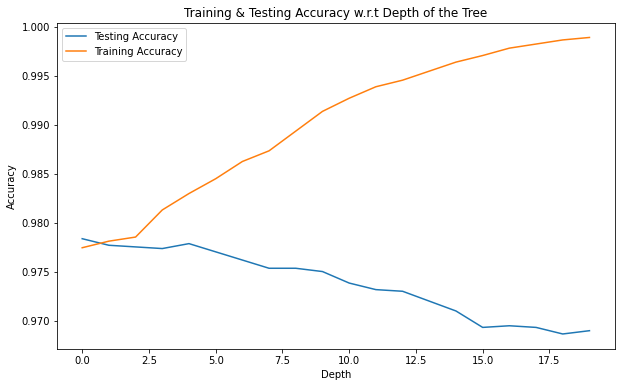

In [3]:
acc = np.zeros((20,2))

# decision-surfaces as fn of max depth
for depth in range(0,20):
    clf = DecisionTreeClassifier(max_depth=depth+1, random_state=0)
    clf.fit(X_train,y_train)
    preds_test = clf.predict(X_test)
    preds_train = clf.predict(X_train)
    acc_test = accuracy_score(y_test,preds_test)
    acc_train = accuracy_score(y_train,preds_train)
    acc[depth,0] = acc_test
    acc[depth,1] = acc_train

# Plot train accuracy vs test accuracy
plt.figure(figsize=(10,6))
plt.plot(acc[:,0])
plt.plot(acc[:,1])
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Training & Testing Accuracy w.r.t Depth of the Tree")
plt.legend(["Testing Accuracy","Training Accuracy"])
plt.show()

Part 1B
[2pts] What trends do you observe in the training and test accuracies as depth increases? Explain these trends.

### Part 1B Answer:
I am seeing that as the depth of the tree increases, the testing accuracy decreases and the
training accuracy increases. This means that there is an overfitting of our model on this dataset.

Part 2A
[3pts] For `n_estimators` ranging from 1 to 101 with step size 10, fit random forest classifiers to the training data. Use `random_state=0` and `max_depth=3`. Plot training vs. test accuracy.

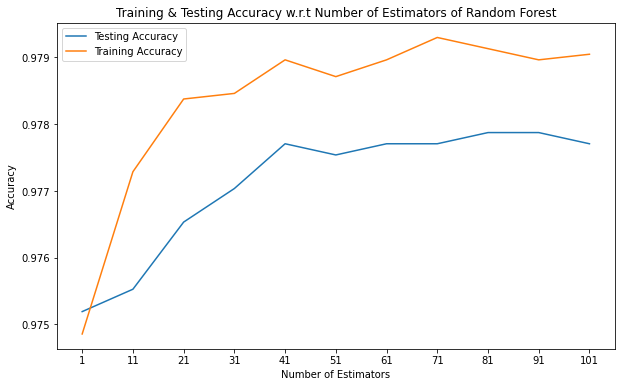

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

acc = np.zeros((11,2))

# decision-surfaces as fn of max depth
for n_est in range(0,101,10):
    clf = RandomForestClassifier(n_estimators=n_est+1, max_depth=3, random_state=0)
    clf.fit(X_train,y_train)
    preds_test = clf.predict(X_test)
    preds_train = clf.predict(X_train)
    acc_test = accuracy_score(y_test,preds_test)
    acc_train = accuracy_score(y_train,preds_train)
    acc[int(n_est/10),0] = acc_test
    acc[int(n_est/10),1] = acc_train

# Plot train accuracy vs test accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1,102,10), acc[:,0])
plt.plot(range(1,102,10), acc[:,1])
plt.xlabel("Number of Estimators")
plt.xticks(range(1,102,10))
plt.ylabel("Accuracy")
plt.title("Training & Testing Accuracy w.r.t Number of Estimators of Random Forest")
plt.legend(["Testing Accuracy","Training Accuracy"])
plt.show()

Part 2B
What trends do you observe in the training and test accuracies as `n_estimators` increases? Explain these trends.

### Part 2B Answer:

I am seeing that as the number of estimators increase, the train and test accuracy increase
together. This means that the model is not overfitting, but performing better with the increased
number of estimators.
